<a href="https://colab.research.google.com/github/imran-ANU/labour_market/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.rename(columns={'CustomerID':'ID','Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [ ]:
df

,ID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().any()

ID        False
gender    False
age       False
income    False
score     False
dtype: bool

In [ ]:
df.isnull().sum()

ID        0
gender    0
age       0
income    0
score     0
dtype: int64

In [ ]:
df.describe()

,ID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


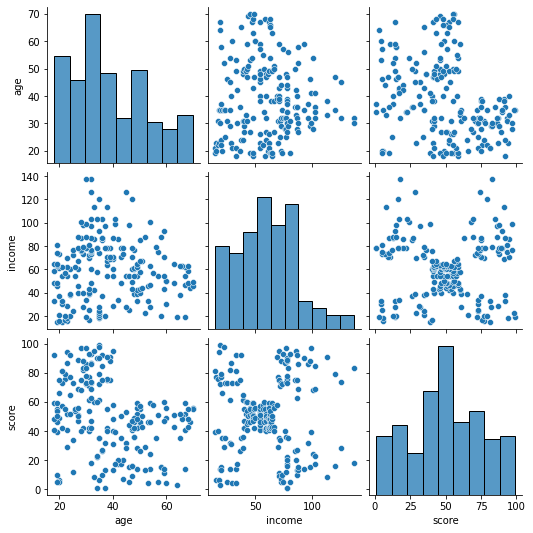

In [ ]:
sb.pairplot(df[['age','income','score']])

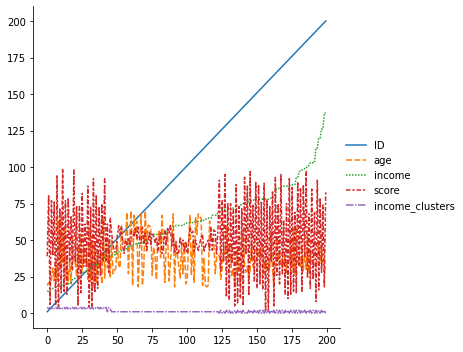

In [ ]:
sb.relplot(data=df, kind="line")

In [ ]:
x1 = df[['income']]
x2 = df[['age']]

In [ ]:
y = df[['score']]

In [ ]:
model = KMeans(n_clusters=5)

In [ ]:
model.fit(df[['income','score']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [ ]:
df['income_clusters'] = model.labels_

In [ ]:
df

,ID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [ ]:
df.income_clusters.value_counts()

1    81
0    39
2    35
4    23
3    22
Name: income_clusters, dtype: int64

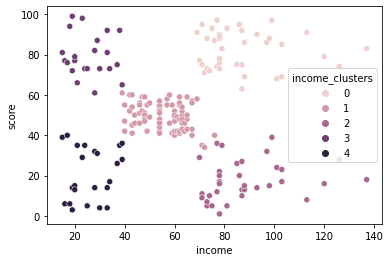

In [ ]:
sb.scatterplot(x='income',y='score',hue='income_clusters',data=df)
sb.color_palette("cubehelix", as_cmap=True)

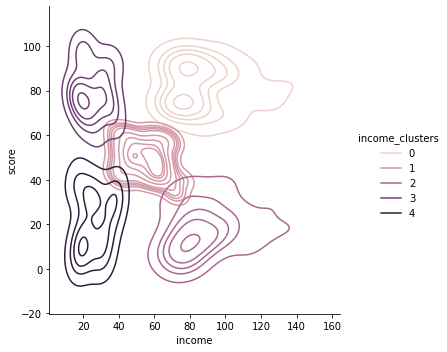

In [ ]:
#penguins = sb.load_dataset(df)
sb.displot(df, x="income", y="score", hue="income_clusters", kind="kde")

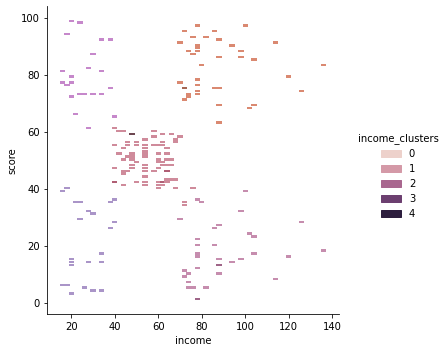

In [ ]:
sb.displot(df, x="income", y="score", hue="income_clusters", binwidth=(2, .5))

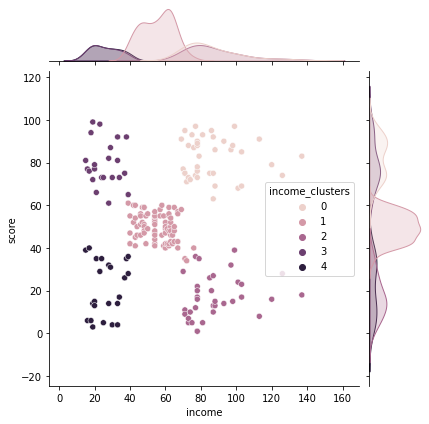

In [ ]:
sb.jointplot(data=df, x="income", y="score", hue="income_clusters")

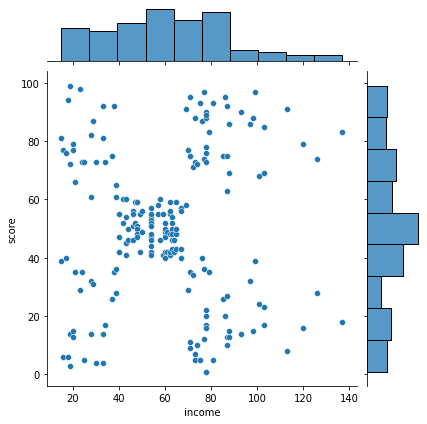

In [ ]:
sb.jointplot(data=df, x="income", y="score")

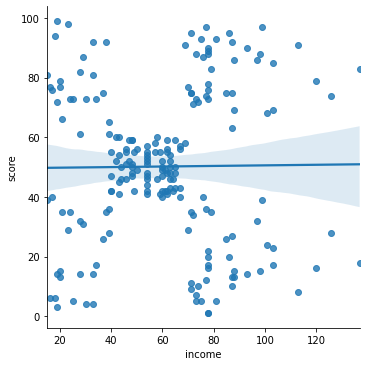

In [ ]:
sb.lmplot(x="income", y="score", data=df)

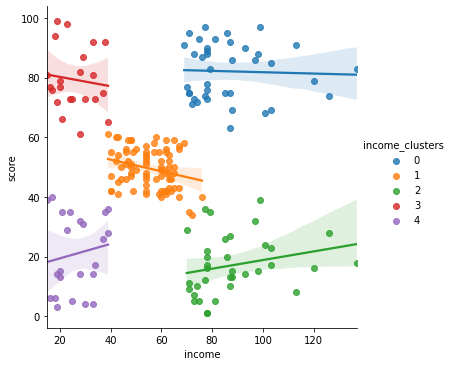

In [ ]:
sb.lmplot(x="income", y="score", hue="income_clusters", data=df)